# Finding the average distance from a random point to a metro station

In [174]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon, LineString
from shapely.ops import nearest_points
import pyrosm
import matplotlib.pyplot as plt
import osmnx  as ox
import warnings

warnings.filterwarnings("ignore")

The files to be used for this analysis are the metro dataset, the milano shapefile and the Immobiliare dataset, all available in the repository in the "Dataset" folder.

In [175]:
metro = gpd.read_file('metro.geojson')
mi = gpd.read_file('milano.shp')
immobiliare = gpd.read_file('~/Desktop/Project/dataImmobiliare.csv')

This time, the most useful areas to keep are the ones present on the website Immobiliare.it, as they are bigger, which allows us to work with more surface.

In [176]:
dic = {'RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO':'Famagosta, Barona', 'TRENNO':'San Siro, Trenno',
'PORTELLO':'Fiera, Sempione, City Life, Portello', 'BOVISASCA':'Affori, Bovisa', 'PARCO NORD':'Bicocca, Niguarda', 'FIGINO':'San Siro, Trenno', 
'LORETO - CASORETTO - NOLO':'Città Studi, Susa', 'QUARTO OGGIARO - VIALBA - MUSOCCO':'Affori, Bovisa', 
'ISOLA':'Cenisio, Sarpi, Isola', 'QUARTO CAGNINO':'Bisceglie, Baggio, Olmi', 'STADIO - IPPODROMI':'San Siro, Trenno', 'QUINTO ROMANO':'Bisceglie, Baggio, Olmi', 
'DUOMO': 'Centro', 'GUASTALLA':'Quadronno, Palestro, Guastalla', 'SAN SIRO':'San Siro, Trenno', 'COMASINA':'Affori, Bovisa', 'TIBALDI':'Navigli', 'GRECO - SEGNANO':'Bicocca, Niguarda', 
'DE ANGELI - MONTE ROSA':'Fiera, Sempione, City Life, Portello', 'FARINI':'Cenisio, Sarpi, Isola', 'BRUZZANO':'Bicocca, Niguarda', 'QT 8':'San Siro, Trenno', 'STEPHENSON':'Viale Certosa, Cascina Merlata',
 'CANTALUPA':'Famagosta, Barona', 'QUINTOSOLE':'Ripamonti, Vigentino', 'PARCO SEMPIONE':'Arco della Pace, Arena, Pagano', 'BARONA':'Famagosta, Barona', 
 'VILLAPIZZONE - CAGNOLA - BOLDINASCO':'Viale Certosa, Cascina Merlata', "PARCO BOSCO IN CITTA'":'San Siro, Trenno', 'GORLA - PRECOTTO':'Precotto, Turro', 
 "NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE FULVIO TESTI":'Bicocca, Niguarda', 
 'TRIULZO SUPERIORE':'Ponte Lambro, Santa Giulia', 'PTA ROMANA':'Porta Romana, Cadore, Montenero', 'TALIEDO - MORSENCHIO - Q.RE FORLANINI':'Forlanini', 
 'PORTA TICINESE - CONCA DEL NAVIGLIO':'Genova, Ticinese', 'TRE TORRI':'Fiera, Sempione, City Life, Portello', 
 'ASSIANO':'Bisceglie, Baggio, Olmi', 'MORIVIONE':'Ripamonti, Vigentino', 
 'VIGENTINO - Q.RE FATIMA':'Ripamonti, Vigentino', 'BICOCCA':'Bicocca, Niguarda', 'ORTOMERCATO':'Porta Vittoria, Lodi', 'LODI - CORVETTO':'Corvetto, Rogoredo', 
 'MUGGIANO':'Bisceglie, Baggio, Olmi', 'PORTA TICINESE - CONCHETTA':'Navigli', 'UMBRIA - MOLISE - CALVAIRATE':'Porta Vittoria, Lodi', 
 'ROSERIO':'Affori, Bovisa', 'RONCHETTO DELLE RANE':'Abbiategrasso, Chiesa Rossa', 'Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO':'San Siro, Trenno', 
 "MONLUE' - PONTE LAMBRO":'Forlanini', 'PADOVA - TURRO - CRESCENZAGO':'Cimiano, Crescenzago, Adriano', 
 'GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE':'Abbiategrasso, Chiesa Rossa', 'PORTA MAGENTA':'Arco della Pace, Arena, Pagano', 'FORZE ARMATE':'San Siro, Trenno', 
 'GHISOLFA':'Cenisio, Sarpi, Isola', 'CHIARAVALLE':'Ripamonti, Vigentino', 'PARCO DELLE ABBAZIE':'Ripamonti, Vigentino', 'MACIACHINI - MAGGIOLINA':'Maggiolina, Istria', 
 'BANDE NERE':'Bande Nere, Inganni', 'LAMBRATE - ORTICA':'Udine, Lambrate', 'STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA FALLATA':'Abbiategrasso, Chiesa Rossa',
 'PORTA VIGENTINA - PORTA LODOVICA':'Navigli', 'SCALO ROMANA':'Corvetto, Rogoredo', 'XXII MARZO':'Porta Romana, Cadore, Montenero', 
 'CIMIANO - ROTTOLE - Q.RE FELTRE':'Udine, Lambrate', 'DERGANO':'Affori, Bovisa', 'BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA':'Bisceglie, Baggio, Olmi', 
 'PARCO FORLANINI - CAVRIANO':'Udine, Lambrate', 'GIARDINI P.TA VENEZIA':'Quadronno, Palestro, Guastalla', 'PORTA GARIBALDI - PORTA NUOVA':'Garibaldi, Moscova, Porta Nuova', 
 'AFFORI':'Affori, Bovisa', 'BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE':'Porta Venezia, Indipendenza', 'MONCUCCO - SAN CRISTOFORO':'Famagosta, Barona', 
 'STAZIONE CENTRALE - PONTE SEVESO':'Centrale, Repubblica', 'BOVISA':'Affori, Bovisa', 'MAGGIORE - MUSOCCO - CERTOSA':'Viale Certosa, Cascina Merlata', 
 'GIAMBELLINO':'Famagosta, Barona', "CITTA' STUDI":'Città Studi, Susa', 'PORTA GENOVA':'Navigli', 'CORSICA':'Città Studi, Susa', 
 'MAGENTA - S. VITTORE':'Genova, Ticinese', 
 'CASCINA MERLATA':'Viale Certosa, Cascina Merlata', 'SARPI':'Cenisio, Sarpi, Isola', 'PARCO DEI NAVIGLI':'Famagosta, Barona', 'PAGANO':'Arco della Pace, Arena, Pagano', 'BRERA':'Centro', 
 'ROGOREDO - SANTA GIULIA':'Ponte Lambro, Santa Giulia', 'ADRIANO':'Cimiano, Crescenzago, Adriano', 'LORENTEGGIO':'Bande Nere, Inganni'}

translation = pd.DataFrame(dic.items(), columns=['NIL', 'Zone'])
new = translation.merge(immobiliare)
new= new[['NIL', 'Rent', 'Zone']]
mappa = mi.merge(new)
mappa = mappa[['NIL', 'Zone', 'Shape_Area', 'geometry', 'Rent']]

For this part of the analysis I choose the central area 'Centro', a peripherical area, 'Famagosta', and something in the middle, 'Ticinese'. \
The areas of the neigborhoods Centro and Famagosta are approximately the same size, but the area of Ticinese is smaller. This can be a factor in the final results.

In [193]:
centro = mappa.loc[mappa.Zone == 'Centro']
centro = centro.dissolve(by='Zone')

famagosta = mappa.loc[mappa.Zone == 'Famagosta, Barona']
famagosta = famagosta.dissolve(by='Zone')

ticinese = mappa.loc[mappa['Zone'] == 'Genova, Ticinese']
ticinese = ticinese.dissolve(by='Zone')

Then, the metro dataset is filtered to obtain only the stops present in the three selected areas.

In [178]:
mcentro = metro.assign(**{key: metro.geometry.within(geom) for key, geom in centro.geometry.items()})
mcentro = mcentro.loc[mcentro.Centro==True]
mcentro["long"] = mcentro['geometry'].map(lambda p: p.x)
mcentro["lat"] = mcentro['geometry'].map(lambda p: p.y)

mfamag = metro.assign(**{key: metro.geometry.within(geom) for key, geom in famagosta.geometry.items()})
mfamag = mfamag.loc[mfamag['Famagosta, Barona']==True]
mfamag["long"] = mfamag['geometry'].map(lambda p: p.x)
mfamag["lat"] = mfamag['geometry'].map(lambda p: p.y)

mtici = metro.assign(**{key: metro.geometry.within(geom) for key, geom in ticinese.geometry.items()})
mtici = mtici.loc[mtici['Genova, Ticinese']==True]
mtici["long"] = mtici['geometry'].map(lambda p: p.x)
mtici["lat"] = mtici['geometry'].map(lambda p: p.y)

Now, in order to calculate an average, 20 random points will be selected inside of each polygon. However, since the polygons are concave, some point are computed outside the shape. For this reason, a selection is made taking only the data inside the polygons.

In [179]:
def Random_Points_in_Bounds(polygon, number):   
    minx, miny, maxx, maxy = polygon.bounds
    x = np.random.uniform( minx, maxx, number )
    y = np.random.uniform( miny, maxy, number )
    return x, y

x,y = Random_Points_in_Bounds(centro.geometry.values[0], 20)
df = pd.DataFrame()
df['points'] = list(zip(x,y))
df['points'] = df['points'].apply(Point)
random_center = gpd.GeoDataFrame(df, geometry='points')
random_center = random_center[random_center.within(centro.geometry.values[0])]

random_center["long"] = random_center['points'].map(lambda p: p.x)
random_center["lat"] = random_center['points'].map(lambda p: p.y)

<AxesSubplot: >

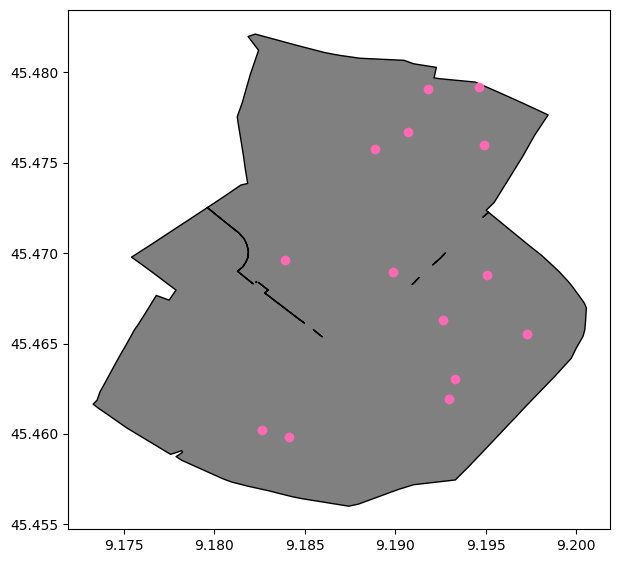

In [194]:
base = centro.plot(color='gray', edgecolor='black', figsize=(7,7))
random_center.plot(ax = base, c = 'hotpink')   #visualizing the random points inside the polygon

In [181]:
x2,y2 = Random_Points_in_Bounds(famagosta.geometry.values[0], 20)
df2 = pd.DataFrame()
df2['points'] = list(zip(x2,y2))
df2['points'] = df2['points'].apply(Point)
random_famag = gpd.GeoDataFrame(df2, geometry='points')
random_famag = random_famag[random_famag.within(famagosta.geometry.values[0])]

random_famag["long"] = random_famag['points'].map(lambda p: p.x)
random_famag["lat"] = random_famag['points'].map(lambda p: p.y)

<AxesSubplot: >

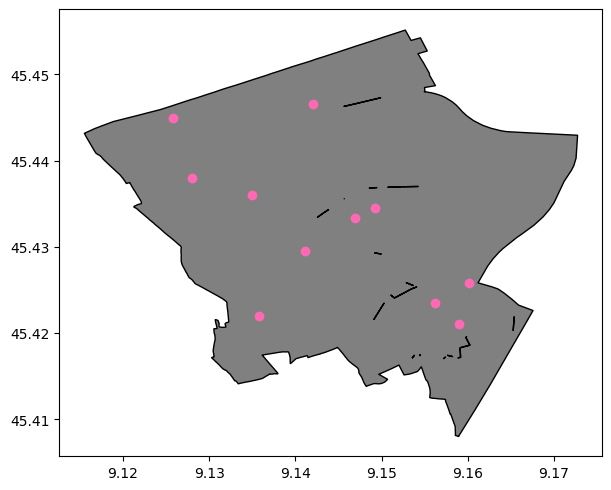

In [182]:
base = famagosta.plot(color='gray', edgecolor='black', figsize=(7,7))
random_famag.plot(ax = base, c = 'hotpink')

In [183]:
x3,y3 = Random_Points_in_Bounds(ticinese.geometry.values[0], 20)
df3 = pd.DataFrame()
df3['points'] = list(zip(x3,y3))
df3['points'] = df3['points'].apply(Point)
random_tici = gpd.GeoDataFrame(df3, geometry='points')
random_tici = random_tici[random_tici.within(ticinese.geometry.values[0])]

random_tici["long"] = random_tici['points'].map(lambda p: p.x)
random_tici["lat"] = random_tici['points'].map(lambda p: p.y)

<AxesSubplot: >

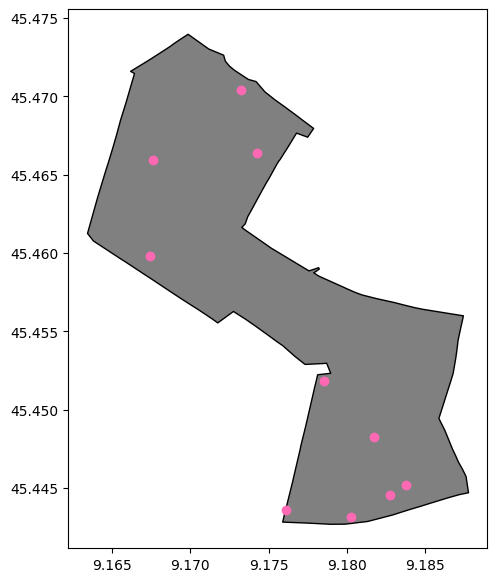

In [184]:
base = ticinese.plot(color='gray', edgecolor='black', figsize=(7,7))
random_tici.plot(ax = base, c = 'hotpink')

Now, the nearest points are calculated using openstreetmap and the network feature. Precisely, the walking distances will be computed, because we are considering the reachablity of a metro stop, which usually does not involve private transport methods.

In [185]:
osm = pyrosm.OSM("Milano_poly.osm.pbf")   #OSM file available in the repository, in the same folder of this file
nodes, edges = osm.get_network(network_type="walking", nodes=True)

In [186]:
network_onx = osm.to_graph(nodes, edges, graph_type="networkx")

In [187]:
mcentro_close = ox.distance.nearest_nodes(network_onx,Y=mcentro.lat,X=mcentro.long)
random_points_centro = ox.distance.nearest_nodes(network_onx,Y=random_center.lat,X=random_center.long)

In [188]:
def route_nodes_to_line_networkx(nodelist, network,solution=1):
  points = []
  for idnode in nodelist:
    lon = network.nodes[idnode]['x']
    lat = network.nodes[idnode]['y']
    point = Point(lon,lat)
    points.append(point)
  path = LineString(points)
  route = gpd.GeoDataFrame(
    {"src_node": [nodelist[0]], "tgt_node": [nodelist[-1]], "solution": [solution]},
      geometry=[path],
      crs="epsg:4326"
  )
  return route

After having set up the base map of Milan and the walking network, the average distance of the selected neighborhoods is computed.

In [189]:
def avg_distance(random_points, metro_close):
    res = []
    for point in random_points:
        l = []
        for metro in metro_close:
            shortest_path = ox.shortest_path(network_onx, metro, point, weight="length")
            route = route_nodes_to_line_networkx(shortest_path, network_onx)
            l.append(route.length.values[0]*1000)

        res.append(min(l))

    return sum(res)/len(res)

print('Average walking distance in the area "Centro":', avg_distance(random_points_centro, mcentro_close))

Average walking distance in the area "Centro": 4.984765041743072


Now the same can be done for the other two areas.

In [190]:
mfama_close = ox.distance.nearest_nodes(network_onx,Y=mfamag.lat,X=mfamag.long)
random_points_fama = ox.distance.nearest_nodes(network_onx,Y=random_famag.lat,X=random_famag.long)

print('Average walking distance in the area "Famagosta"', avg_distance(random_points_fama, mfama_close))

Average walking distance in the area "Famagosta" 33.28850347026437


In [191]:
mtici_close = ox.distance.nearest_nodes(network_onx,Y=mtici.lat,X=mtici.long)
random_points_tici = ox.distance.nearest_nodes(network_onx,Y=random_tici.lat,X=random_tici.long)

print('Average distance in the area "Ticinese"', avg_distance(random_points_tici, mtici_close))

Average distance in the area "Ticinese" 14.393970707321108


As a final result, it shows that the area of the city center has a very small average distance from a random point to any metro station. \
Then, the area "in the middle" has a higher average distance, which is surprising, as the area of this neighborhood is smaller than the two, so I was expecting a lower average distance. However, it can be noted that the Ticinese area has inside the Navigli, which is a series water channels that can be crossed only in the presence of bridges, and the train station Porta Genova, which blocks the way for some roads and needs to be walked around. \
Finally, the peripherical area of Famagosta has the longest average distance, since only one metro stop is present in the area. 

Below is an example of the area of Ticinese, to show the obstacles present in the city, which prevents a pedestrian to reach their destination in a faster way.

In [192]:
example_metro = ox.distance.nearest_nodes(network_onx,Y=mtici.lat,X=mtici.long)
example_randompoint = ox.distance.nearest_nodes(network_onx,Y=random_tici.lat,X=random_tici.long)

shortest_path = ox.shortest_path(network_onx, example_metro[0], example_randompoint[0], weight="length")
route = route_nodes_to_line_networkx(shortest_path, network_onx)
route.explore()